# Regressão Logística 

Vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [145]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [146]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Montamos uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [147]:
# Calculando a quantidade de doentes, saudáveis e o total
tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
tab


flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [148]:
# Calculando a média de doentes
media_doentes = tab[1]['All'] / 2

# Mostrando a média de doentes
print(f"Média de Doentes: {media_doentes} ")

Média de Doentes: 69.5 


In [149]:
# Calculando Odds feminino
tab['odds'] = tab[1]/tab[0]

# Calculando odds ratio com o total como referência, (razão de chances)
tab['RC_vs_male'] = tab['odds'] / tab.loc[0, 'odds']

# Calculando o logito (LOG(Odds))
tab['logito'] = np.log(tab['odds'])

# Calculando Log do odds ratio (WOE)
tab['woe'] = np.log(tab['RC_vs_male'])

# Visualizando Dataframe com alterações
tab


flag_doente,0,1,All,odds,RC_vs_male,logito,woe
sex,,,,,,,
0.0,72,25,97,0.347222,1.000000,-1.057790,0.000000
1.0,92,114,206,1.239130,3.568696,0.214410,1.272200
All,164,139,303,0.847561,2.440976,-0.165392,0.892398


2. Montamos uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorizamos a variável em 5 grupos
- Calculamos as mesmas quantidades calculadas anteriormente
- Calculamos também o valor médio da variável ```age```

#### Categorizando a variável 'age' em 5 grupos

In [150]:
# Definindo os limites dos intervalos de idade para dividir em 5 grupos
age_bins = [29, 40, 50, 60, 70, 78]  # Ajustando o último limite para a idade máxima

# Definindo os rótulos para as categorias
age_labels = ['29-39', '40-49', '50-59', '60-69', '70-77']

# Criando uma nova coluna 'age_group' com as categorias
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Mostrando as primeiras linhas do DataFrame 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_group
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,60-69
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,60-69
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,60-69
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,29-39
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,40-49


In [151]:
# Criando a tabela de contingência para idade
tab_idade = pd.crosstab(df['age_group'], df['flag_doente'], margins=True)

# Calculando a media de doentes para cada idade
tab_idade['media_doentes'] = tab_idade[1] / tab_idade['All']

# Calculando Odds
tab_idade['odds'] = tab_idade[1] / tab_idade[0]

# Calculando o odds ratio com o total como referência
tab_idade['RC_total'] = tab_idade['odds'] / tab_idade.loc['All', 'odds']

# Calculando o logito (LOG(Odds))
tab_idade['logito'] = np.log(tab_idade['odds'])

# Calculando Log do odds ratio (WOE)
tab_idade['woe'] = np.log(tab_idade['RC_total'])

# Visualizando o DF
tab_idade

flag_doente,0,1,All,media_doentes,odds,RC_total,logito,woe
age_group,,,,,,,,
29-39,11,6,17,0.352941,0.545455,0.639634,-0.606136,-0.446860
40-49,53,23,76,0.302632,0.433962,0.508891,-0.834798,-0.675521
50-59,64,66,130,0.507692,1.031250,1.209308,0.030772,0.190048
60-69,30,43,73,0.589041,1.433333,1.680815,0.360003,0.519279
70-77,5,1,6,0.166667,0.200000,0.234532,-1.609438,-1.450162
All,163,139,302,0.460265,0.852761,1.000000,-0.159276,0.000000


In [152]:
# Calculando a média variável age (média da idade)
media_idade = df['age'].mean()

media_idade

54.43894389438944

3. Visualizando a informação da bivariada construída acima através de alguns gráficos.

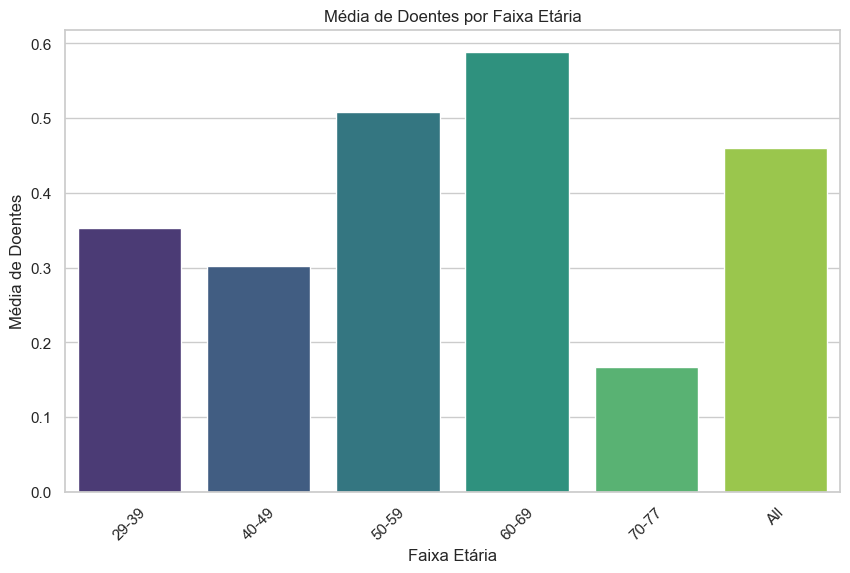

In [153]:
# Crie o gráfico de barras
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=tab_idade.index, y=tab_idade['media_doentes'], palette="viridis")
plt.title("Média de Doentes por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Média de Doentes")
plt.xticks(rotation=45)  

# Mostrando o gráfico
plt.show()

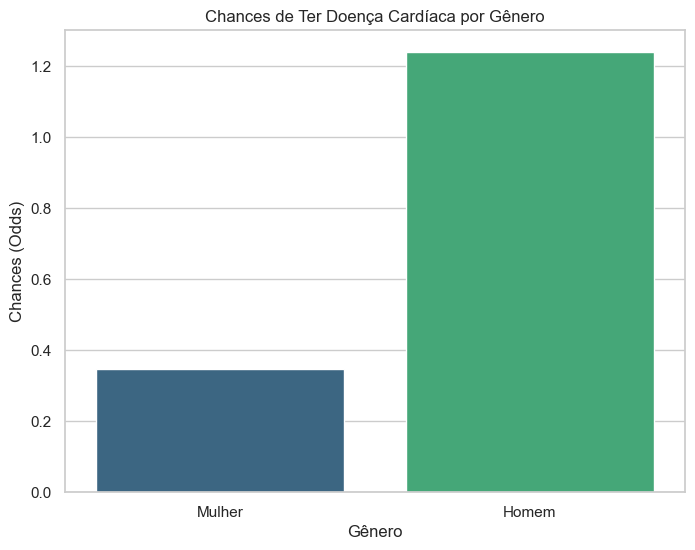

In [154]:
# Criando o gráfico de barras

sns.set(style="whitegrid")

# alterando de 0 e 1 para homem e mulher para melhor visualização do gráfico
tab['sex'] = tab.index.map({0.0: "Mulher", 1.0: "Homem"})

plt.figure(figsize=(8, 6))
sns.barplot(x=tab['sex'], y=tab['odds'], palette="viridis")
plt.title("Chances de Ter Doença Cardíaca por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Chances (Odds)")

# Mostrando o gráfico
plt.show()


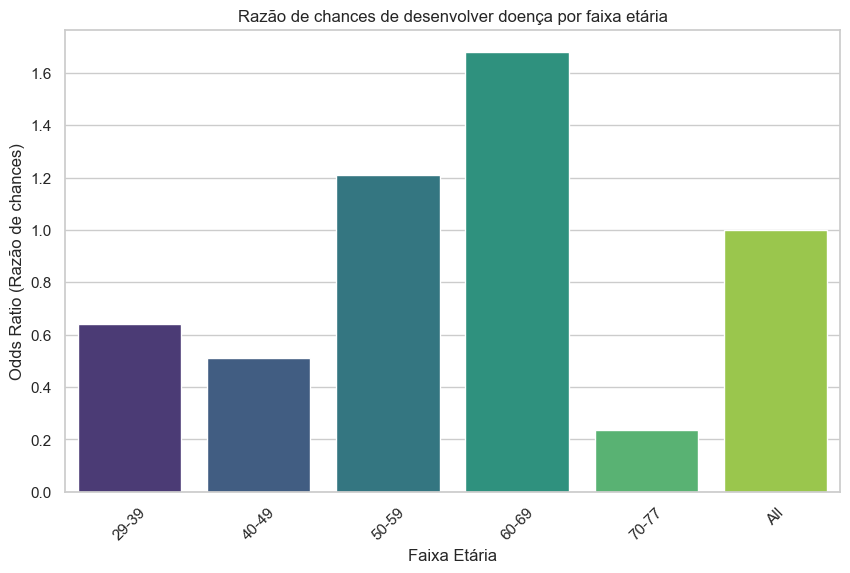

In [155]:
# Criando o gráfico de barras
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=tab_idade.index, y=tab_idade['RC_total'], palette="viridis")
plt.title("Razão de chances de desenvolver doença por faixa etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Odds Ratio (Razão de chances)")

# Mostrando o gráfico
plt.xticks(rotation=45)  
plt.show()